# 自己回帰和分移動平均 (AR Integrated MA, ARIMA) モデル

## 理論
- 定義
    - $(p,d,q)$次のARIMAモデル: $d$ 階差分をとった系列 $y_t-y_{t-d}$ が**定常**かつ**反転可能**なARMA $(p,q)$ 過程に従う過程
    - $y_t-y_{t-d}=c+\phi_1y_{t-1}+\cdots+\phi_py_{t-p}+\varepsilon_t+\theta_1\varepsilon_{t-1}+\cdots+\theta_q\varepsilon_{t-q}$

- <font color="red">原系列は非定常だが、差分系列が定常</font>である場合に有効なモデルではないだろうか
    - もう少し詳細に記述すると、非定常な成分として <font color="red">$d$ 次式で表されるトレンド</font>をもつ時系列（$d$次和分過程）に有効
        - $d$ 次式で表されるトレンドは、$d$階差分で除去可能

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(12345)

## シミュレーションデータの生成
但し、ARMA過程

In [3]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [4]:
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [5]:
dates = pd.date_range('1980-1-1', freq="M", periods=nobs)
y = pd.Series(y, index=dates)
y.head()

1980-01-31   -0.204708
1980-02-29    0.192353
1980-03-31   -0.084332
1980-04-30   -0.837072
1980-05-31    0.816031
Freq: M, dtype: float64

## ARIMAモデルの構築

In [6]:
arma_mod = ARIMA(y, order=(2, 2, 2), trend='n')
arma_res = arma_mod.fit()

## 結果の分析

### モデル全体の評価
- sunspots data に対してARMAモデルをフィッティングさせた時と比較して、尤度や情報量規準がいい感じ（もちろんフェアな比較じゃないが）

### 推定パラメータの評価
- いずれのパラメータもp値が有意水準 (5%) を下回っており、おおよそ信頼できる結果
- MAパラメータと攪乱項の分散が若干ばらついている (std err)

In [8]:
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -367.486
Date:                Wed, 10 Mar 2021   AIC                            744.972
Time:                        15:50:47   BIC                            762.539
Sample:                    01-31-1980   HQIC                           752.044
                         - 10-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3487      0.052     25.726      0.000       1.246       1.451
ar.L2         -0.6202      0.053    -11.780      0.000      -0.723      -0.517
ma.L1         -1.9949      0.488     -4.089      0.0

## 推論
後半ほど信頼区間が広がっており、精度が下がっている

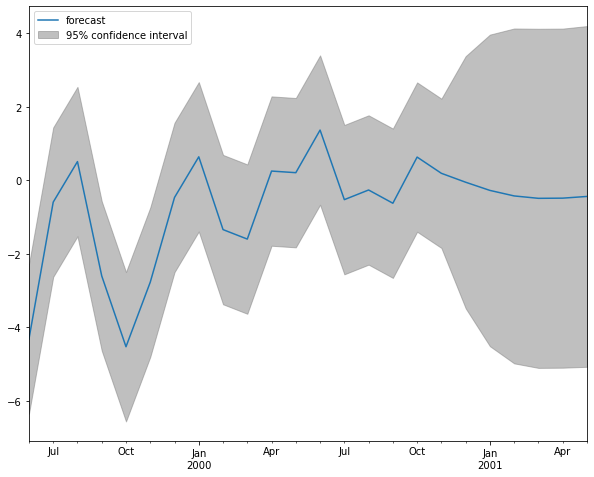

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = plot_predict(arma_res, start='1999-06-30', end='2001-05-31', ax=ax)
legend = ax.legend(loc='upper left')